In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u
import time

In [2]:
def convert(t):
    return time.mktime(time.strptime(t, '%Y-%m-%d %H:%M:%S'))

def convert_deg(d):
    deg=d.split("d")[0]
    m=d.split("d")[1].split("m")[0]
    s=d.split("m")[1].split("s")[0]
    deg=float(deg)+float(m)/60+float(s)/3600
    return deg

def time_to_float(x):
    H=float(x.split(":")[0])
    M=float(x.split(":")[1])
    return H+M/60.0

def ZM(kot):
    return 1.0/(np.cos(kot*np.pi/180.0)+0.50572*np.power(96.07995-kot,-1.6364))

def Rp(kot1,kot2):
    return np.power(0.7,np.power(ZM(kot1),0.678))*np.cos(kot2*np.pi/180.0)

def d2r(x):
    return np.deg2rad(x)

def f_vzhod(alfa,beta):
    s1=np.sin(d2r(alfa))*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1*35*5.9)#/np.sin(d2r(alfa))

def f_jug(alfa,beta):
    s1=np.cos(d2r(alfa-180))*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1*12*5.9)#/np.sin(d2r(alfa))

def f_zahod(alfa,beta):
    s1=np.sin(d2r(alfa)+180)*np.cos(d2r(beta))
    if (s1<0 or beta<0):
        s1=0
    return (s1*35*5.9)#/np.sin(d2r(alfa))

def f_gori(alfa,beta):
    s1=np.cos(d2r(beta-90))
    if s1<0:
        s1=0
    return (s1*35*12)#/np.sin(d2r(alfa))

def f(alfa,beta):
    return [f_vzhod(alfa,beta),f_jug(alfa,beta),f_zahod(alfa,beta),f_gori(alfa,beta)]

In [3]:
df=pd.read_csv("solar_daily.csv")
df=df.drop(columns=["Unnamed: 0"])
df["date"]=df["date"].apply(lambda x:x.split("T")[0])
df["rise_f"]=df["rise"].apply(lambda x:time_to_float(x))
df["set_f"]=df["set"].apply(lambda x:time_to_float(x))

display(df)
df_hourly=pd.read_csv("solar_hourly.csv")
df_hourly=df_hourly.drop(columns=["Unnamed: 0"])
df_hourly["datetime"]=df_hourly["date"]
df_hourly["date"]=df_hourly["date"].apply(lambda x:x.split("T")[0])
df_hourly["time"]=df_hourly["datetime"].apply(lambda x:x.split("T")[1])
df_hourly["time"]=df_hourly["time"].apply(lambda x:time_to_float(x))
display(df_hourly)

,date,month,max alt,rise az,rise,set az,set,dt,rise_f,set_f
0,2022-01-01,1,20.400180,123.492574,06:43:00,236.766321,15:24:00,8.683333,6.716667,15.400000
1,2022-01-02,1,20.487986,123.353930,06:43:00,236.917585,15:25:00,8.700000,6.716667,15.416667
2,2022-01-03,1,20.583499,123.211524,06:43:00,237.074738,15:26:00,8.716667,6.716667,15.433333
3,2022-01-04,1,20.686490,123.065482,06:43:00,237.237874,15:27:00,8.733333,6.716667,15.450000
4,2022-01-05,1,20.797044,122.915926,06:43:00,237.407080,15:28:00,8.750000,6.716667,15.466667
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,12,20.064966,123.972156,06:42:00,236.107797,15:19:00,8.616667,6.700000,15.316667
361,2022-12-28,12,20.112418,123.855102,06:42:00,236.229803,15:20:00,8.633333,6.700000,15.333333
362,2022-12-29,12,20.167596,123.913824,06:43:00,236.357311,15:21:00,8.633333,6.716667,15.350000
363,2022-12-30,12,20.230604,123.788355,06:43:00,236.490415,15:22:00,8.650000,6.716667,15.366667


,date,month,day,H,M,alt,az,datetime,time
0,2022-01-01,1,1,0,0,-62.273617,31.008565,2022-01-01T00:00:00,0.000000
1,2022-01-01,1,1,0,1,-62.362717,31.486848,2022-01-01T00:01:00,0.016667
2,2022-01-01,1,1,0,2,-62.453034,31.962462,2022-01-01T00:02:00,0.033333
3,2022-01-01,1,1,0,3,-62.544557,32.435400,2022-01-01T00:03:00,0.050000
4,2022-01-01,1,1,0,4,-62.637272,32.905653,2022-01-01T00:04:00,0.066667
...,...,...,...,...,...,...,...,...,...
503695,2022-12-31,12,31,22,55,-65.619183,355.701618,2022-12-31T22:55:00,22.916667
503696,2022-12-31,12,31,22,56,-65.607229,356.274959,2022-12-31T22:56:00,22.933333
503697,2022-12-31,12,31,22,57,-65.596989,356.848761,2022-12-31T22:57:00,22.950000
503698,2022-12-31,12,31,22,58,-65.588466,357.422953,2022-12-31T22:58:00,22.966667


for i,ii in df_hourly.iterrows():
    t1=df[df["date"]==ii["date"]]["rise_f"].values[0]
    t2=df[df["date"]==ii["date"]]["set_f"].values[0]
    dt=df[df["date"]==ii["date"]]["dt"].values[0]
    t=ii["time"]
    ddt=(t-t1)/dt*180
    if ii["alt"]<0:
        ddt=0
        Rpp=0
    else:
        ddt=np.abs(90-ddt)
        Rpp=Rp(ddt,90-ii["alt"])
    print(ii["date"],"%.2f"%ii["time"],"%.2f"%ii["alt"],"%.2f"%ddt,"%.2f"%ZM(ddt),"%.2f"%(Rpp))

In [5]:
dg=df_hourly.groupby("date")
data=[]
df_stat={}
df_stat["date"]=[]
df_stat["min"]=[]
df_stat["max"]=[]
df_stat["avg_1"]=[]
df_stat["avg_2"]=[]
df_stat["Wh"]=[]
for i,ii in dg:
    t1=df[df["date"]==i]["rise_f"].values[0]
    t2=df[df["date"]==i]["set_f"].values[0]
    dt=df[df["date"]==i]["dt"].values[0]
    
    t=ii["time"].to_list()
    ddt=[(ti-t1)/dt*180 if (ti>=t1 and ti<=t2) else 0 for ti in t]
    aa=ii["alt"].to_list()
    ddt=[np.abs(90-ti) for ti in ddt]
    Rpp=[Rp(ddt[k],90-aa[k]) for k in range(len(aa))]
    Rpp=[rr if rr>0 else 0 for rr in Rpp]
    df_stat["date"].append(i)
    df_stat["min"].append(min(Rpp))
    df_stat["max"].append(max(Rpp))
    df_stat["avg_1"].append(np.mean(Rpp))
    df_stat["avg_2"].append(np.mean([kk for kk in Rpp if kk>0]))
    dt=df[df["date"]==i]["dt"].values[0]
    df_stat["Wh"].append(np.mean([kk for kk in Rpp if kk>0])*dt)
    data.append(Rpp)
    print(dt,df[df["date"]==i]["dt"].values[0])
    print(i,"%.3f"%np.mean(Rpp),"%.3f"%(np.mean([kk for kk in Rpp if kk>0])*dt),"%.3f"%max(Rpp),"%.3f"%min(Rpp),"%.3f"%np.std(Rpp))

8.683333333333334 8.683333333333334
2022-01-01 0.054 1.236 0.244 0.000 0.086
8.7 8.7
2022-01-02 0.054 1.243 0.245 0.000 0.086
8.716666666666667 8.716666666666667
2022-01-03 0.054 1.251 0.246 0.000 0.087
8.733333333333333 8.733333333333333
2022-01-04 0.055 1.260 0.247 0.000 0.087
8.75 8.75
2022-01-05 0.055 1.269 0.249 0.000 0.088
8.766666666666667 8.766666666666667
2022-01-06 0.056 1.279 0.250 0.000 0.088
8.8 8.8
2022-01-07 0.056 1.290 0.251 0.000 0.089
8.816666666666666 8.816666666666666
2022-01-08 0.057 1.301 0.253 0.000 0.089
8.833333333333334 8.833333333333334
2022-01-09 0.057 1.312 0.254 0.000 0.090
8.883333333333333 8.883333333333333
2022-01-10 0.058 1.326 0.256 0.000 0.091
8.9 8.9
2022-01-11 0.058 1.339 0.258 0.000 0.091
8.933333333333334 8.933333333333334
2022-01-12 0.059 1.353 0.260 0.000 0.092
8.95 8.95
2022-01-13 0.059 1.366 0.262 0.000 0.093
9.0 9.0
2022-01-14 0.060 1.382 0.264 0.000 0.094
9.016666666666667 9.016666666666667
2022-01-15 0.061 1.397 0.266 0.000 0.094
9.05 9.05

14.333333333333336 14.333333333333336
2022-04-29 0.209 4.811 0.593 0.000 0.228
14.383333333333333 14.383333333333333
2022-04-30 0.211 4.842 0.595 0.000 0.229
14.416666666666664 14.416666666666664
2022-05-01 0.212 4.870 0.597 0.000 0.230
14.483333333333333 14.483333333333333
2022-05-02 0.213 4.902 0.599 0.000 0.230
14.533333333333333 14.533333333333333
2022-05-03 0.214 4.931 0.601 0.000 0.231
14.566666666666665 14.566666666666665
2022-05-04 0.216 4.958 0.603 0.000 0.232
14.633333333333333 14.633333333333333
2022-05-05 0.217 4.988 0.604 0.000 0.233
14.666666666666664 14.666666666666664
2022-05-06 0.218 5.015 0.606 0.000 0.233
14.716666666666667 14.716666666666667
2022-05-07 0.219 5.043 0.608 0.000 0.234
14.75 14.75
2022-05-08 0.220 5.069 0.609 0.000 0.235
14.8 14.8
2022-05-09 0.222 5.096 0.611 0.000 0.235
14.85 14.85
2022-05-10 0.223 5.122 0.613 0.000 0.236
14.883333333333333 14.883333333333333
2022-05-11 0.224 5.147 0.614 0.000 0.236
14.933333333333335 14.933333333333335
2022-05-12 0.22

13.516666666666667 13.516666666666667
2022-08-29 0.187 4.290 0.557 0.000 0.213
13.466666666666667 13.466666666666667
2022-08-30 0.185 4.255 0.554 0.000 0.212
13.416666666666664 13.416666666666664
2022-08-31 0.183 4.220 0.551 0.000 0.211
13.366666666666667 13.366666666666667
2022-09-01 0.182 4.184 0.548 0.000 0.210
13.3 13.3
2022-09-02 0.180 4.147 0.546 0.000 0.209
13.25 13.25
2022-09-03 0.179 4.111 0.543 0.000 0.208
13.216666666666667 13.216666666666667
2022-09-04 0.177 4.076 0.540 0.000 0.207
13.15 13.15
2022-09-05 0.176 4.039 0.537 0.000 0.206
13.1 13.1
2022-09-06 0.174 4.002 0.534 0.000 0.204
13.05 13.05
2022-09-07 0.172 3.966 0.531 0.000 0.203
13.0 13.0
2022-09-08 0.171 3.929 0.528 0.000 0.202
12.933333333333335 12.933333333333335
2022-09-09 0.169 3.890 0.525 0.000 0.201
12.883333333333333 12.883333333333333
2022-09-10 0.168 3.853 0.522 0.000 0.199
12.833333333333336 12.833333333333336
2022-09-11 0.166 3.816 0.519 0.000 0.198
12.766666666666667 12.766666666666667
2022-09-12 0.164 3

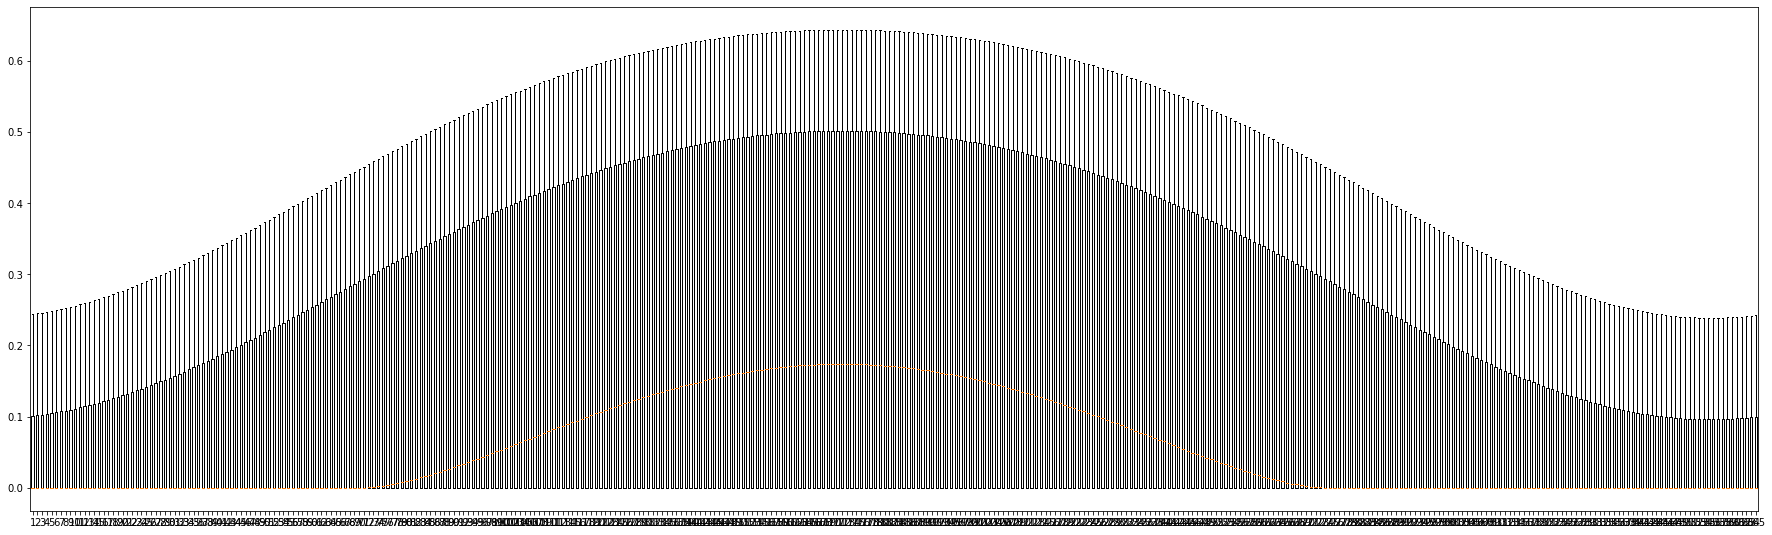

In [6]:
fig = plt.figure(figsize =(24, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

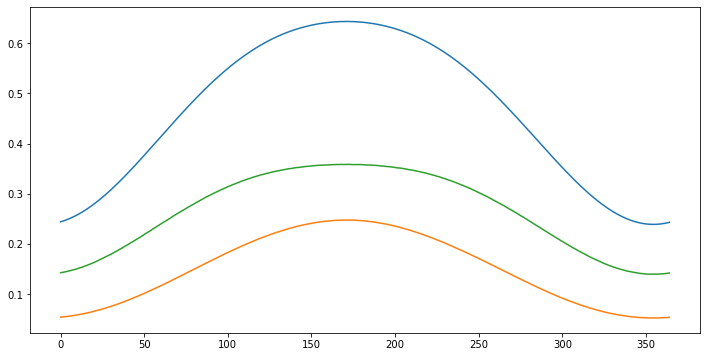

In [7]:
try:
    df_stat=pd.DataFrame.from_dict(df_stat)
except:
    pass
df_stat.to_csv("stat.csv")
plt.figure(figsize=(12,6))
plt.plot(df_stat["max"])
plt.plot(df_stat["avg_1"])
plt.plot(df_stat["avg_2"])
plt.show()

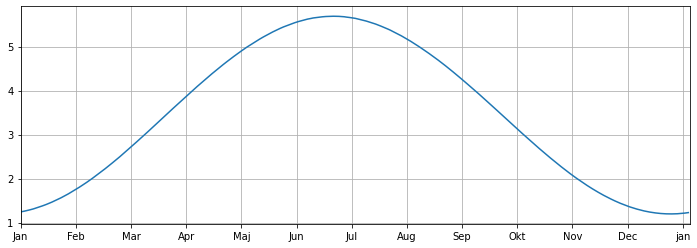

In [8]:
try:
    df_stat=pd.DataFrame.from_dict(df_stat)
except:
    pass
df_stat.to_csv("stat.csv")
plt.figure(figsize=(12,4))
plt.plot(df_stat["Wh"])
plt.xlim(1,365)
plt.xticks([i for i in range(1,362,30)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.grid()
plt.show()

13
12


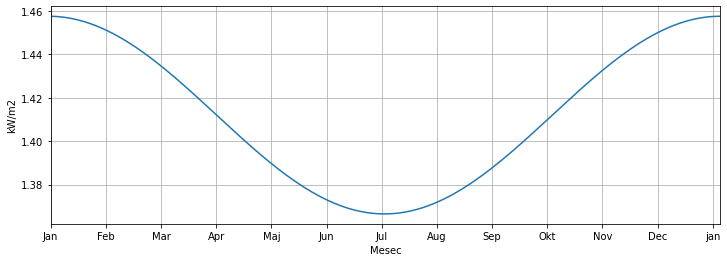

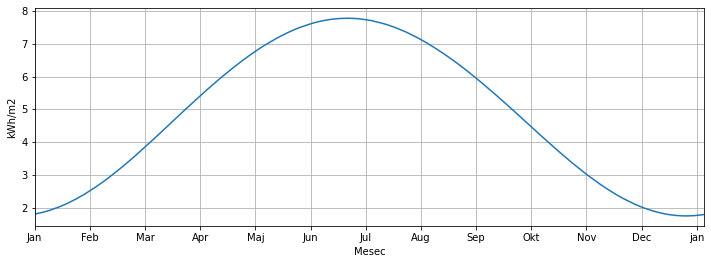

1.745352576731186 7.7815439835736635


In [9]:
dj=1412-1321
j=[1321+dj*(0.5*np.cos(2*np.pi/365*i)+1) for i in range(1,366,1)]

plt.figure(figsize=(12,4))
plt.ylabel("kW/m2")
plt.plot([i for i in range(1,366,1)],[i/1000 for i in j])
print(len([i for i in range(1,365,30)]))
print(len(["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec"]))
plt.xticks([i for i in range(1,362,30)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(1,365)
plt.xlabel("Mesec")
plt.grid()
plt.show()

ic=0
for i,ii in df_stat.iterrows():
    j[ic]=j[ic]*ii["Wh"]/1000
    ic+=1

df_stat.to_csv("stat.csv")
plt.figure(figsize=(12,4))
plt.ylabel("kWh/m2")
plt.plot([i for i in range(1,366,1)],j)
plt.xticks([i for i in range(1,362,30)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(1,365)
plt.xlabel("Mesec")
plt.grid()
plt.show()

print(min(j),max(j))

In [10]:
print(7.7815439835736635/1.745352576731186)

4.458436700593449


In [11]:
df_hourly["time_2"]=df_hourly["datetime"].apply(lambda x:x.split("T")[1][0:5])
display(df_hourly.head(5))

df_1h={}
df_1h["date"]=[]
df_1h["time"]=[]
df_1h["azi"]=[]
df_1h["alt"]=[]
df_1h["I0"]=[]
df_1h["Id"]=[]
df_1h["Sr"]=[]
df_1h["Rd"]=[]


dg=df_hourly.groupby("date")
ic=0
for j,jj in dg:
    t1=df[df["date"]==j]["rise_f"].values[0]
    t2=df[df["date"]==j]["set_f"].values[0]
    dt=t2-t1
    #print(j,t1,t2)
    dh=jj.groupby("H")
    for i,ii in dh:
        t=ii["time"].to_list()
        ddt=0
        if(i>=t1 and i<=t2):
            ddt=(t-t1)/dt*180
        ddt=np.abs(90-ddt)
        df_1h["date"].append(j)
        df_1h["time"].append(ii['time'].min())
        df_1h["azi"].append(ii['az'].min())
        df_1h["alt"].append(ii['alt'].mean())
        df_1h["I0"].append(1.35+(1.60-1.25)*0.5*(np.cos(2*np.pi/(365*24)*(ic-(10*60))+1)))
        yy=0
        if i>=t1 and i<=t2:
            yy=Rp(ddt,90-df_1h["alt"][-1])
        df_1h["Rd"].append(np.mean(yy))
        r=f(df_1h["azi"][-1],df_1h["alt"][-1])
        df_1h["Id"].append(df_1h["I0"][-1]*df_1h["Rd"][-1]*sum(r))
        df_1h["Sr"].append(sum(r))
        ic+=1
df_1h=pd.DataFrame.from_dict(df_1h)
df_1h.to_csv("df_1h.csv")
display(df_1h.loc[10:20,:])

,date,month,day,H,M,alt,az,datetime,time,time_2
0,2022-01-01,1,1,0,0,-62.273617,31.008565,2022-01-01T00:00:00,0.000000,00:00
1,2022-01-01,1,1,0,1,-62.362717,31.486848,2022-01-01T00:01:00,0.016667,00:01
2,2022-01-01,1,1,0,2,-62.453034,31.962462,2022-01-01T00:02:00,0.033333,00:02
3,2022-01-01,1,1,0,3,-62.544557,32.435400,2022-01-01T00:03:00,0.050000,00:03
4,2022-01-01,1,1,0,4,-62.637272,32.905653,2022-01-01T00:04:00,0.066667,00:04


C:\Users\Rene\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


,date,time,azi,alt,I0,Id,Sr,Rd
10,2022-01-01,10.0,164.724396,19.882779,1.496685,133.705157,377.691380,0.236527
11,2022-01-01,11.0,179.304477,20.031871,1.496617,131.044704,366.743403,0.238752
12,2022-01-01,12.0,193.921940,17.600644,1.496548,114.055052,373.906038,0.203827
13,2022-01-01,13.0,207.865440,12.844089,1.496480,72.058982,353.302098,0.136292
14,2022-01-01,14.0,220.704942,6.182550,1.496411,22.072220,303.404770,0.048615
...,...,...,...,...,...,...,...,...
16,2022-01-01,16.0,243.109093,-10.090880,1.496273,0.000000,0.000000,0.000000
17,2022-01-01,17.0,253.279690,-19.858968,1.496204,0.000000,0.000000,0.000000
18,2022-01-01,18.0,263.409142,-30.091524,1.496135,0.000000,0.000000,0.000000
19,2022-01-01,19.0,274.209754,-40.323949,1.496066,0.000000,0.000000,0.000000


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


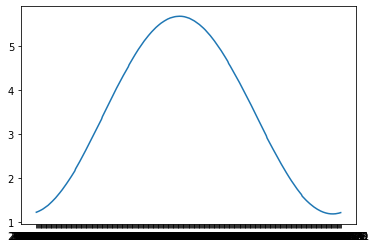

In [12]:
plt.plot(df_1h.groupby("date")["Rd"].sum())
plt.show()

# Load Vreme

In [137]:
df_Vreme=pd.read_csv("Vreme_urni.csv")
display(df_Vreme)

,date,time,T,J
0,2021-01-01,00:00,1.30,0.0
1,2021-01-01,01:00,1.25,0.0
2,2021-01-01,02:00,1.15,0.0
3,2021-01-01,03:00,0.95,0.0
4,2021-01-01,04:00,0.80,0.0
...,...,...,...,...
8755,2021-12-31,19:00,-0.45,0.0
8756,2021-12-31,20:00,-0.55,0.0
8757,2021-12-31,21:00,-0.80,0.0
8758,2021-12-31,22:00,-1.05,0.0


In [142]:
try:
    df_1h=df_1h.drop(columns=["T"])
    display(df_1h)
except:
    pass
df_all=pd.merge(df_1h, df_Vreme, on = "date", how = "left")
for i,ii in df_all.iterrows():
    df_all.loc[i,"T"]=df_Vreme.loc[i,"T"]
    df_all.loc[i,"J"]=df_Vreme.loc[i,"J"]
    df_all.loc[i,"Jd"]=df_Vreme.loc[i,"J"]*df_all.loc[i,"Sr"]/1000
print(df_all["T"].min())

-12.1


In [143]:
display(df_all)
for i,ii in df_all[df_all["date"]=="2022-01-01"].iterrows():
    for j in df_all.columns:
        print(ii[j],end="\t")
    print()
print(df_all["Jd"].mean(),df_all["Id"].mean())

,date,time_x,azi,alt,I0,Id,Sr,Rd,time_y,T,J,Jd
0,2022-01-01,0.0,31.008565,-59.495037,1.497366,0.0,0.0,0.0,NaN,1.30,0.0,0.0
1,2022-01-01,1.0,55.109226,-51.246202,1.497298,0.0,0.0,0.0,NaN,1.25,0.0,0.0
2,2022-01-01,2.0,71.927517,-41.495508,1.497231,0.0,0.0,0.0,NaN,1.15,0.0,0.0
3,2022-01-01,3.0,84.753101,-31.280969,1.497163,0.0,0.0,0.0,NaN,0.95,0.0,0.0
4,2022-01-01,4.0,95.654162,-21.040521,1.497095,0.0,0.0,0.0,NaN,0.80,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8390,2022-12-31,18.0,263.426057,-30.256571,1.516962,0.0,0.0,0.0,NaN,2.30,87.5,0.0
8391,2022-12-31,19.0,274.227333,-40.489044,1.516924,0.0,0.0,0.0,NaN,1.80,38.5,0.0
8392,2022-12-31,20.0,286.828179,-50.292938,1.516887,0.0,0.0,0.0,NaN,1.30,7.0,0.0
8393,2022-12-31,21.0,303.199898,-58.767179,1.516849,0.0,0.0,0.0,NaN,1.00,0.0,0.0


2022-01-01	0.0	31.008564832155557	-59.49503670248514	1.4973662009249342	0.0	0.0	0.0	nan	1.3	0.0	0.0	
2022-01-01	1.0	55.109226357327785	-51.24620210233124	1.497298465807505	0.0	0.0	0.0	nan	1.25	0.0	0.0	
2022-01-01	2.0	71.92751749275557	-41.495507804839	1.497230654910926	0.0	0.0	0.0	nan	1.15	0.0	0.0	
2022-01-01	3.0	84.75310129750835	-31.280969396062446	1.497162768270083	0.0	0.0	0.0	nan	0.95	0.0	0.0	
2022-01-01	4.0	95.65416201260834	-21.040521253200836	1.4970948059199012	0.0	0.0	0.0	nan	0.8	0.0	0.0	
2022-01-01	5.0	105.80295422268057	-11.098730224818008	1.4970267678953442	0.0	0.0	0.0	nan	0.6	0.0	0.0	
2022-01-01	6.0	115.9374375520917	-2.1081229187897694	1.4969586542314146	0.0	0.0	0.0	nan	0.0	0.0	0.0	
2022-01-01	7.0	126.58834844174444	5.324322222297592	1.496890464963155	14.022540412872086	246.08370443825686	0.038067453199228475	nan	-1.05	0.0	0.0	
2022-01-01	8.0	138.155101141675	12.173626041834863	1.4968222001256453	59.6008516357904	314.6684478845199	0.12654035592207297	nan	-1.55	20.0	6.29336

In [144]:
T=15.0#df_all.loc[0,"T"]
def simulate_a_year(T,lam,S,h,nu,alb,Sr,key,regulate=False):
    Tn=T
    eps=5.67*np.power(10,-8.0)
    jj={}
    jj["A"]=[]
    jj["B"]=[]
    jj["C"]=[]
    jj["Tot"]=[]
    jj["Q"]=[]
    jj["Tn"]=[]
    jj["To"]=[]
    for i,ii in df_all.iterrows():
        ja=nu*ii[key]
        if str(ii["Id"])=="nan":
            ja=0
        jb=alb*eps*(np.power(ii["T"]+273,4.0)-np.power(Tn+273,4.0))*Sr
        jc=lam*(ii["T"]-Tn)*Sr
        jj["A"].append(ja)
        jj["B"].append(jb)
        jj["C"].append(jc)
        jj["Tot"].append(jj["A"][-1]+jj["B"][-1]+jj["C"][-1])
        yy=np.array(jj["A"])
        yy1=np.array(jj["B"])
        yy2=np.array(jj["C"])
        jj["Q"].append(np.sum(yy)+np.sum(yy1)+np.sum(yy2))
        if regulate==False:
            Tn=Tn+jj["Tot"][-1]*3600/(S*h*1.29*1005)
        jj["Tn"].append(Tn)
        jj["To"].append(ii["T"])
    return jj

In [146]:
import copy
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
try:
    df_all=copy.deepcopy(df_all_original)
except:
    df_all_original=copy.deepcopy(df_all)
df_all=df_all.append(df_all.loc[0:24*10,:], ignore_index=True)

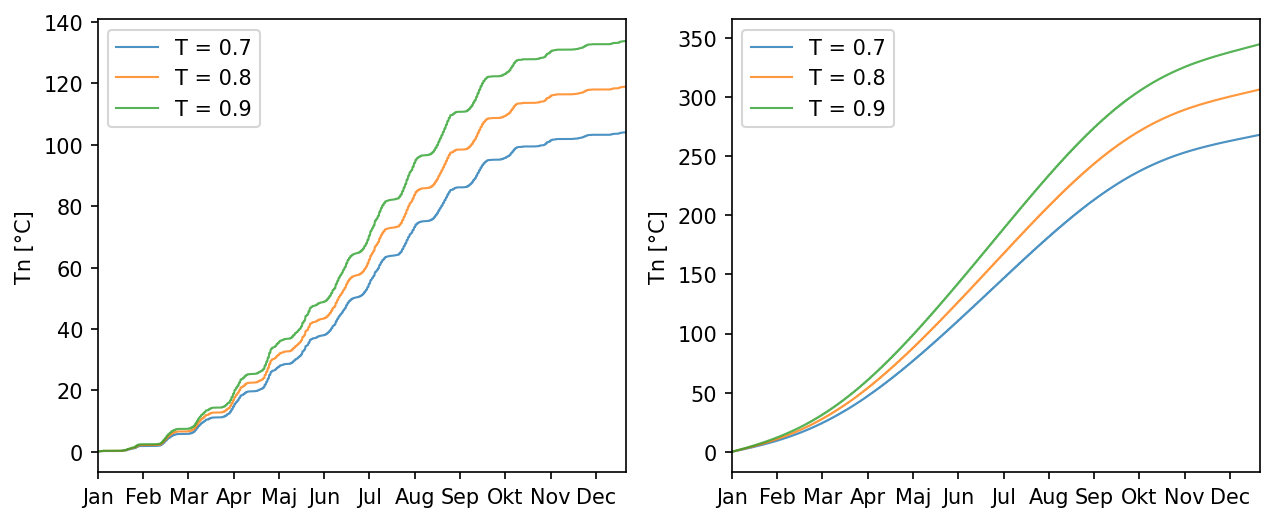

In [147]:
lam=0
a=24.0
b=35.0
h=5.9
S=a*b
Sr=2*a*h+2*b*h+S
V=a*b*h

Trans=0.7
alb=0
T=0
key=["Jd","Id"]

k=0
plt.figure(figsize=(10,4),dpi=150)
plt.subplot(121)
for trans in [0.7,0.8,0.9]:
    r=simulate_a_year(T,lam,S,h,trans,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = %.1f"%(trans),lw=1,alpha=0.8)
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2)
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
plt.ylabel("Tn [°C]")

k=1
plt.subplot(122)
for trans in [0.7,0.8,0.9]:
    r=simulate_a_year(T,lam,S,h,trans,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = %.1f"%(trans),lw=1,alpha=0.8)
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2)
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
plt.ylabel("Tn [°C]")
plt.show()

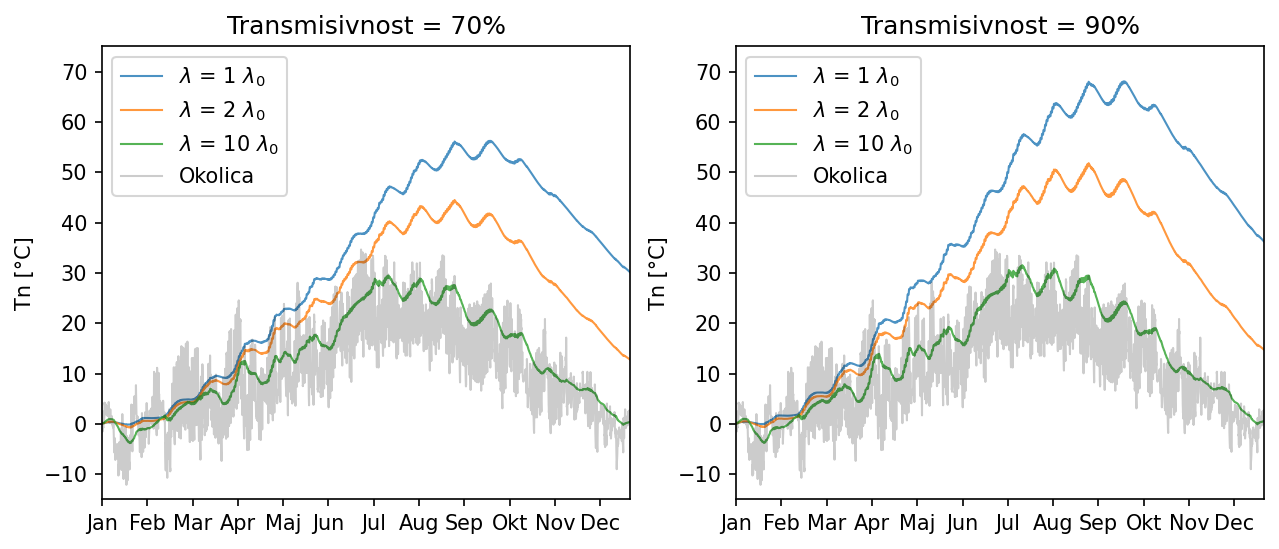

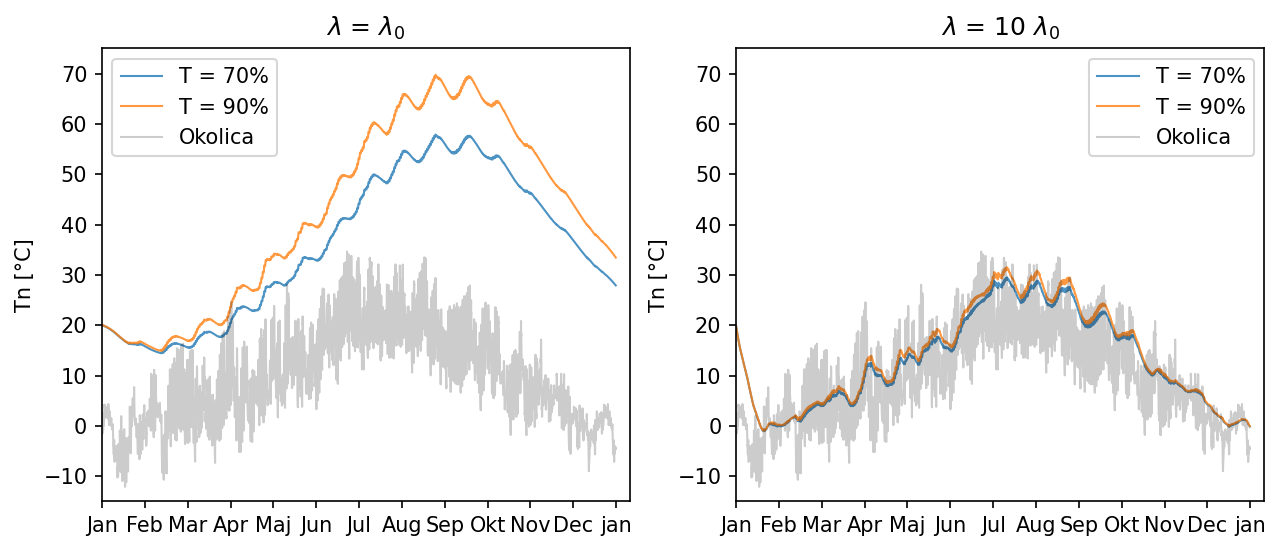

In [148]:
T=0
k=0
plt.figure(figsize=(10,4),dpi=150)
plt.subplot(121)
plt.title("Transmisivnost = 70%")
for lam in [0.0005,0.001,0.005]:
    r=simulate_a_year(T,lam,S,h,0.7,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="$\lambda$ = %d $\lambda_0$"%int(lam/0.0005),lw=1,alpha=0.8)
plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
plt.ylim(-15,75)
plt.ylabel("Tn [°C]")

plt.subplot(122)
plt.title("Transmisivnost = 90%")
for lam in [0.0005,0.001,0.005]:
    r=simulate_a_year(T,lam,S,h,0.9,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="$\lambda$ = %d $\lambda_0$"%int(lam/0.0005),lw=1,alpha=0.8)
plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
plt.ylim(-15,75)
plt.ylabel("Tn [°C]")

plt.show()

T=20
k=0
plt.figure(figsize=(10,4),dpi=150)
plt.subplot(121)
plt.title("$\lambda$ = $\lambda_0$")
for lam in [0.0005]:
    r=simulate_a_year(T,lam,S,h,0.7,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = 70%",lw=1,alpha=0.8)
    r=simulate_a_year(T,lam,S,h,0.9,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = 90%",lw=1,alpha=0.8)
plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,370*24)
plt.ylim(-15,75)
plt.ylabel("Tn [°C]")

plt.subplot(122)
plt.title("$\lambda$ = 10 $\lambda_0$")
for lam in [0.005]:
    r=simulate_a_year(T,lam,S,h,0.7,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = 70%",lw=1,alpha=0.8)
    r=simulate_a_year(T,lam,S,h,0.9,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = 90%",lw=1,alpha=0.8)
plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,370*24)
plt.ylim(-15,75)
plt.ylabel("Tn [°C]")

plt.show()

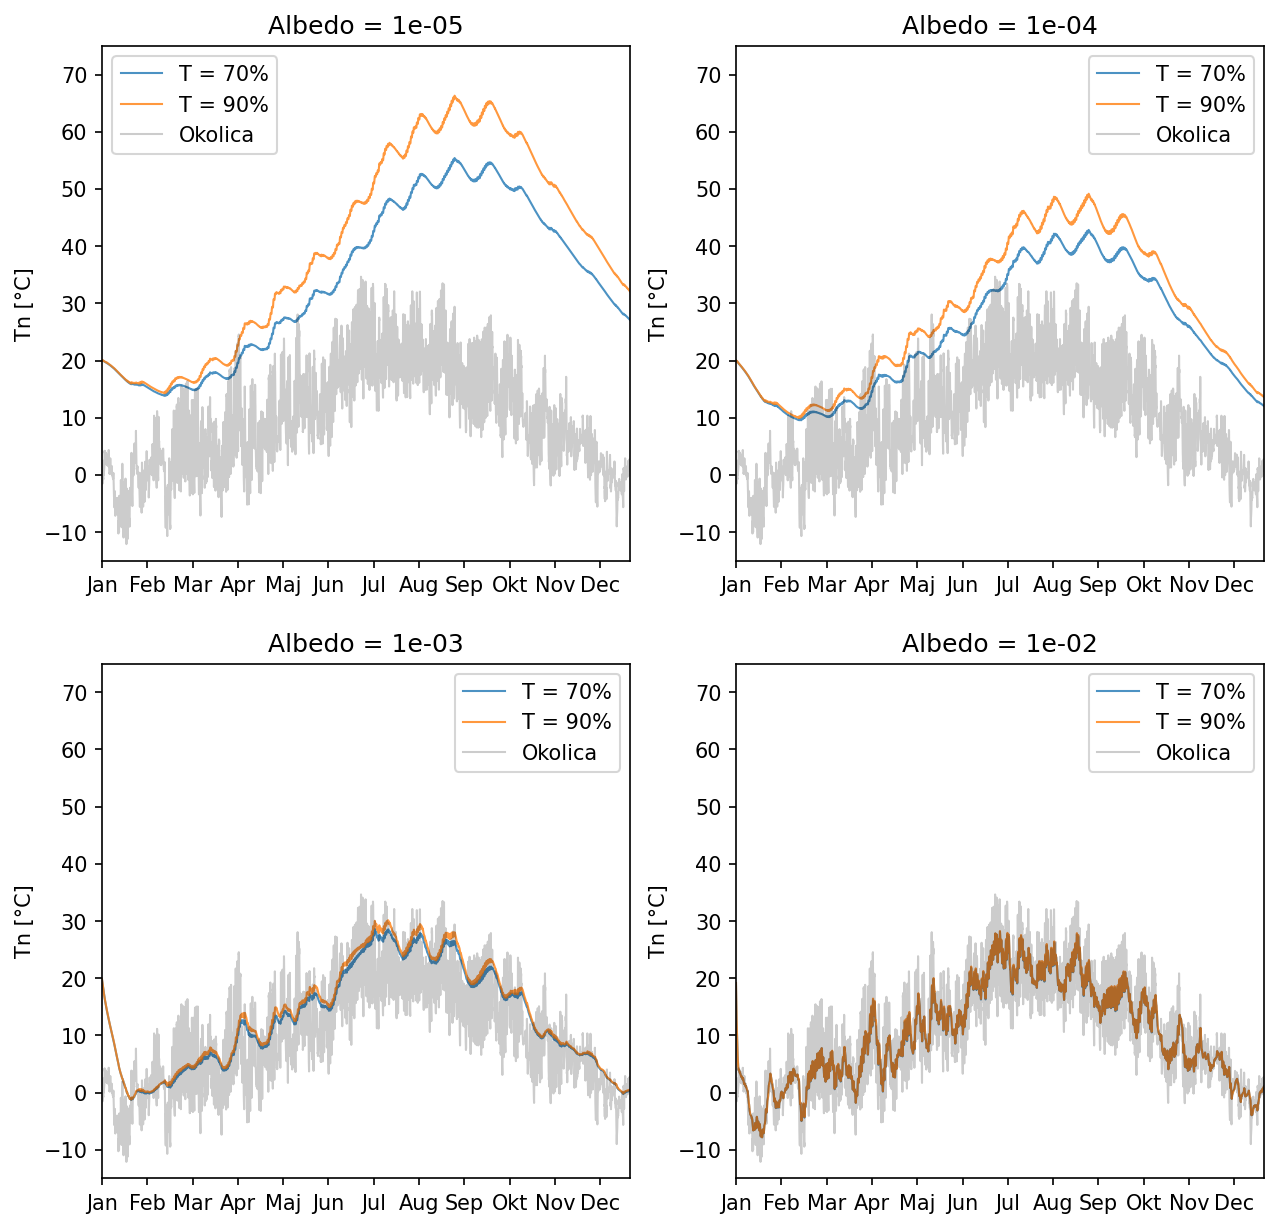

In [96]:
T=20
k=0
plt.figure(figsize=(10,10),dpi=150)

lam=0.0005
alb_p=[0.00001,0.0001,0.001,0.01]
for ic in range(4):
    plt.subplot(int("22%d"%(ic+1)))
    plt.title("Albedo = %.0e"%(alb_p[ic]))
    
    TT=0.7
    r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = %.0f%%"%(TT*100),lw=1,alpha=0.8)
    
    TT=0.9
    r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="T = %.0f%%"%(TT*100),lw=1,alpha=0.8)
    
    plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
    plt.legend()
    #plt.xlim(0,364*24)
    plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
    plt.xlim(0,350*24)
    plt.ylim(-15,75)
    plt.ylabel("Tn [°C]")

'''plt.subplot(122)
plt.title("Transmisivnost = 90%")
for alb in [0.00001,0.0001,0.001,0.01]:
    r=simulate_a_year(T,lam,S,h,0.9,alb,Sr,key[k],regulate=False)
    plt.plot(r["Tn"],label="albedo = %.0e"%alb,lw=1,alpha=0.8)
plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
plt.ylim(-15,75)
plt.ylabel("Tn [°C]")'''

plt.show()

In [ ]:
265 kWh
684 kWh

In [149]:
Q=265*1000*3600
m=V*1.29
print(m,Q)
dT=Q/(m*1005)
dT

6393.24 954000000


148.47772511954557

In [150]:
265*0.3

79.5

In [151]:
265*0.09

23.849999999999998

In [152]:
print(df_all_original["T"].mean())
print(df_all_original["T"].max())
print(df_all_original["T"].min())
print(df_all_original["T"].median())
print(df_all_original["T"].std())

9.96337105419894
34.65000000000001
-12.1
9.3
9.381592236144982


In [153]:
for i in range(0,4,1):
    print("------ Q --------")
    print("%.2f"%df_all_original.loc[i*30*24:(i+1)*4*30*24-1,"T"].mean())
    print("%.2f"%df_all_original.loc[i*30*24:(i+1)*4*30*24-1,"T"].max())
    print("%.2f"%df_all_original.loc[i*30*24:(i+1)*4*30*24-1,"T"].min())
    print("%.2f"%df_all_original.loc[i*30*24:(i+1)*4*30*24-1,"T"].median())
    print("%.2f"%df_all_original.loc[i*30*24:(i+1)*4*30*24-1,"T"].std())

------ Q --------
3.07
24.55
-12.10
2.00
6.40
------ Q --------
12.67
34.65
-10.70
13.25
9.33
------ Q --------
12.02
34.65
-9.00
11.60
8.73
------ Q --------
12.88
34.65
-9.00
12.85
8.60


In [ ]:
T=20
k=0
plt.figure(figsize=(10,4),dpi=150)
plt.subplot(121)
lam=0.0005
ic=0
alb_p=[0.00001,0.0001,0.001,0.01]

TT=0.9
plt.subplot(131)
for T in range(10,28,5):
    r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=False)
    print(TT,"Done")
    jj=[np.sum(r["A"][0:kk]) for kk in range(len(r["A"]))]
    plt.plot(jj,label="$T$ = %.0f°C"%T,lw=0.2,alpha=1)
    
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
#plt.ylim(-15,75)
plt.ylabel("$j_{A}$ [W/m2]")

plt.subplot(132)
for T in range(10,28,5):
    r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=False)
    print(TT,"Done")
    jj=[np.sum(r["B"][0:kk]) for kk in range(len(r["B"]))]
    plt.plot(jj,label="$T$ = %.0f°C"%T,lw=0.2,alpha=1)
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
#plt.ylim(-15,75)
plt.ylabel("$j_{B}$ [W/m2]")

plt.subplot(133)
for T in range(10,28,5):
    r=simulate_a_year(T,lam,S,h,TT,alb_p[ic],Sr,key[k],regulate=False)
    jj=[np.sum(r["C"][0:kk]) for kk in range(len(r["C"]))]
    plt.plot(jj,label="$T$ = %.0f°C"%T,lw=0.2,alpha=1)
#plt.plot(r["To"],label="Okolica",lw=1,alpha=0.2,color="black")
plt.legend()
#plt.xlim(0,364*24)
plt.xticks([i for i in range(1,364*24,30*24)],["Jan","Feb","Mar","Apr","Maj","Jun","Jul","Aug","Sep","Okt","Nov","Dec","jan"])
plt.xlim(0,350*24)
#plt.ylim(-15,75)
plt.ylabel("$j_{C}$ [W/m2]")
plt.show()